# CPS 2023 - Reflexions Experiments

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile 
import scipy.signal as ss
from IPython.display import Audio

In [7]:
file = "practice.wav"
fs, data = wavfile.read(file)
data.shape

(960000,)

In [8]:
d = 8 #m
c = 344 #m/s
delta = d/c
print(delta)
# para encontrar o numero de amostras correspondente
n_delta = delta*fs
print(int(n_delta))
bk = np.zeros(int(n_delta)+1)
bk[int(n_delta)] = 1 
somDireto = ss.lfilter(bk,1,data)

0.023255813953488372
1116


In [9]:
display(Audio(somDireto, rate = fs))

# Reflections

In [12]:
l = 4
delta1 = 2* np.sqrt( l**2 + (d/2)**2)/c
delta2 = (10)/c
print(delta1)
n_delta1= delta1*fs
n_delta2= delta2*fs
print(int(n_delta2))
bk = np.zeros(int(n_delta1)+1)
bk[int(n_delta)] = 1 
bk[int(n_delta1)] = 2
bk[int(n_delta2)] = 1
somReflexos = ss.lfilter(bk,1,data)
display(Audio(somReflexos, rate = fs))

0.03288868749704872
1395


# Reverb (with comb filter)

<StemContainer object of 3 artists>

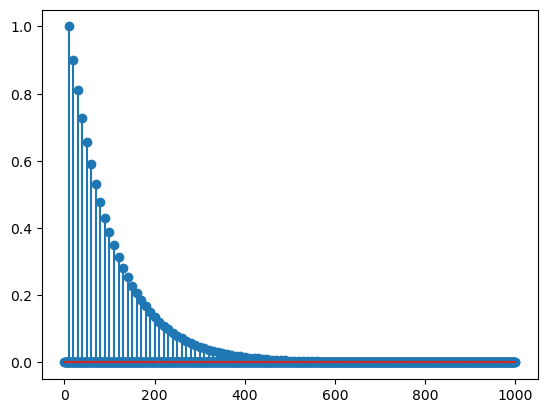

In [11]:
m = 10;g = 0.9
bk_comb= np.zeros(m+1); bk_comb[m] = 1
ak_comb= np.zeros(m+1); ak_comb[0] = 1; ak_comb[m] = -g
impulso = np.hstack([1,np.zeros(1000)])
y = ss.lfilter(bk_comb,ak_comb,impulso); 
plt.stem(y)